[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jmdelvecchio/ears33/blob/main/colab_data_tutorials/How_do_climate_and_geology_influence_soil_diffusion.ipynb)


**How does climate (and other geologic factors) influence soil diffusion?**

This notebook will help you perform exploratory data analysis (EDA) on data from [Richardson et al., 2019](https://pubs.geoscienceworld.org/gsa/geology/article/47/5/423/569535/Influences-of-climate-and-life-on-hillslope), in which the authors compiled data on the [diffusivity of soil-mantled hillslopes](https://earthsurface.readthedocs.io/en/latest/hillslope.html). 

Here are the footnotes from the paper:

a If the exact location was not able to be identified, we used the location that best matched the site description. If multiple measurements were made for a region, we report the mean lat/lon for the study.

b Uncertainties are reported as they were presented in the original journals. If uncertainties were not reported, we calculated and reported the standard deviation of D when possible. 

c Rock category: 1 = unconsolidated, 2 = sedimentary, 3 = Igneous/metamorphic.

d Technique category: 1 = Scarp modeling, 2 = Laplacian and erosion rates, 3 = LEM, 4 = Colluvial flux and slope, 5 = erosion rate and Laplacian.

e Vegetation category: 1 = Arid/desert, 2 = grasslands/scrublands, 3 = savannah/lightly forested, 4=forested.

f West et al. (2014) reported the range of D for noth-facing and south-facing slopes. We reported the mean of these values.


# Import libraries you'll need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bring in the data and clean it

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2019149_TableDR1.csv to 2019149_TableDR1.csv
User uploaded file "2019149_TableDR1.csv" with length 20029 bytes


Other than moving the footnote text to a different file and saving the result as a .csv, I've given you the file as it was uploaded to the Geology Data Repository. Annoyingly, many journals prefer formetting supplemental tables to be human-, rather than machine-readable. Special characters and weird spacing come with the territory. You could edit these things in Excel, but let's see if we can clean this (already pretty clean) data with code.  

In [3]:
# Load the .csv as a pandas data frame. What problems might you anticipate?
df = pd.read_csv("2019149_TableDR1.csv", encoding= 'unicode_escape')
df

,ï»¿Source,Site Location[a],Latitude (deg),Longitude (deg),D (cm2/yr),D[b] uncertainty (cm2/yr),AI,MAP (cm/yr),Underlying lithology description,Lithology category[c],Technique description,Technique category[d],Vegetation description,Vegetation category[e]
0,Almond et al. [2008],"Charwell Basin, New Zealand",-42.450,173.357,50,20,1.42,116.0,Loess underlain by fluvial gravel terraces,1.0,Erosion rate and curvature. Estimate is for th...,2.0,"Podocarp, hardwood, and beech forest",3.0
1,Almond et al. [2008],"Ahuriri, New Zealand",-43.702,172.584,70,20,0.76,68.8,Thick loess deposits underlain by altered basalt,1.0,137Cs fallout nuclides (50 yr timescale) and c...,2.0,Recolonization of forest during Holocene. Rece...,2.0
2,Arrowsmith et al. (1998),"Carrizo Plain, CA, USA",35.271,-119.827,86,8,0.33,46.7,Conglomerate and alluvial fan units.,2.0,Scarp modeling,1.0,Grasses and shrubs,2.0
3,Avouac and Peltzer (1993),"Hotan Region, Xinjiang, China",36.800,80.500,33,14,0.03,3.3,Loose fan gravels,1.0,Scarp modeling,1.0,Unvegetated,1.0
4,Avouac et al. (1993),"Tien Shan, China",44.048,86.790,55,25,0.19,18.4,Loose fan gravels,1.0,Scarp modeling,1.0,Grasses and shrubs,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, this looks a little ugly - there are extra rows and columns and there are some funky symbols going on since they got translated from that journal supplement. 

I'll get you started with renaming the first column

In [4]:
# You can give df.rename a dictionary of old and new names like the following:
df.rename(columns={'ï»¿Source':'Source'}, inplace=True)
# inplace=True means it replaces the column name in the original df rather
# than makes a copy
df.head()

,Source,Site Location[a],Latitude (deg),Longitude (deg),D (cm2/yr),D[b] uncertainty (cm2/yr),AI,MAP (cm/yr),Underlying lithology description,Lithology category[c],Technique description,Technique category[d],Vegetation description,Vegetation category[e]
0,Almond et al. [2008],"Charwell Basin, New Zealand",-42.450,173.357,50,20,1.42,116.0,Loess underlain by fluvial gravel terraces,1.0,Erosion rate and curvature. Estimate is for th...,2.0,"Podocarp, hardwood, and beech forest",3.0
1,Almond et al. [2008],"Ahuriri, New Zealand",-43.702,172.584,70,20,0.76,68.8,Thick loess deposits underlain by altered basalt,1.0,137Cs fallout nuclides (50 yr timescale) and c...,2.0,Recolonization of forest during Holocene. Rece...,2.0
2,Arrowsmith et al. (1998),"Carrizo Plain, CA, USA",35.271,-119.827,86,8,0.33,46.7,Conglomerate and alluvial fan units.,2.0,Scarp modeling,1.0,Grasses and shrubs,2.0
3,Avouac and Peltzer (1993),"Hotan Region, Xinjiang, China",36.800,80.500,33,14,0.03,3.3,Loose fan gravels,1.0,Scarp modeling,1.0,Unvegetated,1.0
4,Avouac et al. (1993),"Tien Shan, China",44.048,86.790,55,25,0.19,18.4,Loose fan gravels,1.0,Scarp modeling,1.0,Grasses and shrubs,2.0


Next you have to get rid of all those NaN (not a number) rows. Learn how to [drop rows and columns with NaNs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) or [particular columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) that are read from converting Excel files to csv files. 

In [5]:
# Code block to eliminate extra rows here

After you've gotten rid of all the NaNs, now can we plot data? 

Pandas has a very acceptable [built-in histogram plotting function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) that can help you quickly visualize your data. 

Try this line out...

In [6]:
df.hist(column='D (cm2/yr)')

ValueError: ignored

Hmm what the heckity heck is this?

In [7]:
df.dtypes

Source                               object
Site Location[a]                     object
Latitude (deg)                      float64
Longitude (deg)                     float64
D (cm2/yr)                           object
D[b] uncertainty (cm2/yr)            object
AI                                  float64
MAP (cm/yr)                         float64
Underlying lithology description     object
Lithology category[c]               float64
Technique description                object
Technique category[d]               float64
Vegetation description               object
Vegetation category[e]              float64
dtype: object

Ugh, looks like you're gonna have to check out a thorough answer to [changing data types](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas) in Pandas columns. 

Depending how you do this you might have to  [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) some strings


In [10]:
# Code block to change data types here
df[['D (cm2/yr)', 'D[b] uncertainty (cm2/yr)']] = df[['D (cm2/yr)', 'D[b] uncertainty (cm2/yr)',]].apply(pd.to_numeric, errors='coerce')

df.dtypes

Source                               object
Site Location[a]                     object
Latitude (deg)                      float64
Longitude (deg)                     float64
D (cm2/yr)                          float64
D[b] uncertainty (cm2/yr)           float64
AI                                  float64
MAP (cm/yr)                         float64
Underlying lithology description     object
Lithology category[c]               float64
Technique description                object
Technique category[d]               float64
Vegetation description               object
Vegetation category[e]              float64
dtype: object

Nice, now you have a nice clean dataset for slicing and visualizing! 

Please plot a histogram of diffusion values:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f358ebeab10>]],
      dtype=object)

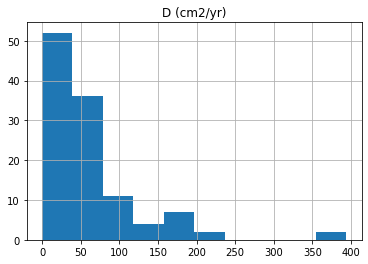

In [11]:
# Histogram code here 
df.hist(column='D (cm2/yr)')

# Reproduce Figure 2: climate variables versus diffusivity

Now for grouping by study! It's nontrivial to create the "other studies" group, so I'll demosntrate the code here:

In [12]:
df['Source_grouping'] = df['Source'].replace(df['Source'].value_counts().index[2:], 'Other studies')

# This code counts the number of unique entries in "Source" and lists them in descending order. 
# Then, preserving the top two occurrences ("Callaghan (2012)" and "This study"), 
# give me the indices of every other "Source" (don't forget, Python starts counting
# at zero, so Callaghan is 0, and This study is 1.) and replace their values
# with the string "Other studies". Then I put it in a column specifically for
# our plotting adventures


print (df['Source_grouping'].value_counts())

# versus

print ('\n', 'versus\n', df['Source'].value_counts()[0:10])

Other studies       57
Callaghan (2012)    48
This study           9
Name: Source_grouping, dtype: int64

 versus
 Callaghan (2012)                                    48
This study                                           9
Ben-Asher et al. (2017)                              5
Hanks et al. (1984)                                  4
Almond et al. [2008]                                 2
McGuire (2014).                                      2
Mattson and Bruhn (2001)                             2
Hurst et al. (2013)                                  2
Perron et al. (2012)                                 2
Reneau (1988) reported in Heimsath et al. (2005)     2
Name: Source, dtype: int64


Now that I've done that, you're free to plot by groups! See how close you can get your plot to Figure 2!!

You'll want this: https://matplotlib.org/stable/api/markers_api.html and this: https://matplotlib.org/3.5.0/gallery/color/named_colors.html

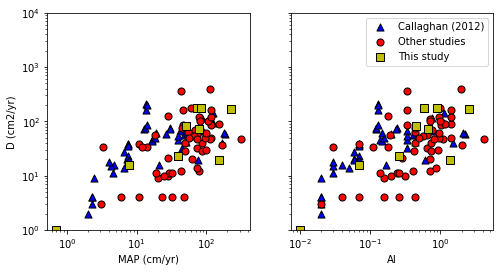

In [14]:
# Insert plot here 

# I'll get you started:

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

# sharey=True means you only have to control and plot one Y axis

# The next bit is a dictionary in which we will assign colors and markers
# to the three groups. As long as the keys (the first values) are equal
# to the study that is being plotted 

# Fill in the value associated with each key (the '') with an appropriate color 
# and marker so it looks like Figure 2. 

color_dict = {'Callaghan (2012)': 'b',
              'Other studies' : 'r',
              'This study' : 'y'}
marker_dict = {'Callaghan (2012)': "^",
              'Other studies' : "o",
              'This study' : 's'}


# Now, fill in the appropriate x and y data

for site, group in df.groupby(by='Source_grouping'): 
    group.plot.scatter(x= 'MAP (cm/yr)', y='D (cm2/yr)',
                       color=color_dict[site],marker=marker_dict[site],
                       edgecolor='k', s=50,
                       ax=ax[0])
    group.plot.scatter(x= 'AI', y='D (cm2/yr)',
                       color=color_dict[site],marker=marker_dict[site],
                       edgecolor='k', s=50,
                       ax=ax[1], legend=True, label=site)


# Set the scale and range of your axes

ax[0].set_yscale('log')
ax[0].set_ylim(10E-1, 10E3)
ax[0].set_xscale('log')
ax[1].set_xscale('log')

# What method was used to determine these values?

A [more recent paper](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2020JF005858) noted that diffusivities derived from the curvature method seemed to give unusual answers since actually, field data tell us curvature doesn't predict erosion in ways we'd expect. 

Make a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) that shows the range of values calculated with the different methods described in the Richardson et al. paper.

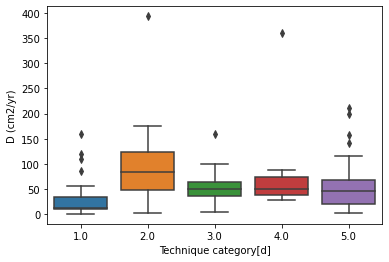

In [15]:
# Boxplot here
sns.boxplot(x="Technique category[d]", y="D (cm2/yr)",
            data=df)

Do some techniques estimate higher or lower D values? Peruse the Richardson paper and speculate why this might be the case. How might you go about deciding if the differences are significant?

*Your text here*

# Sick dataviz

Seaborn has a bunch of fun plot types like [joint plots](https://seaborn.pydata.org/generated/seaborn.jointplot.html) or others out there in the [gallery](https://seaborn.pydata.org/examples/index.html). Make me a cool plot!

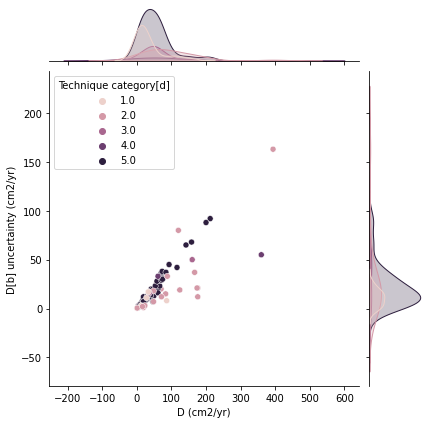

In [16]:
sns.jointplot(x="D (cm2/yr)", y="D[b] uncertainty (cm2/yr)", hue="Technique category[d]",
            data=df)

# How do my field data compare?

In western Alaska where the MAP=43 cm, I've measured surface velocities of an average of 5 cm/year on permafrost soils forming on schists. I convert that into a range of potential volumetric sediment fluxes from 0.2-2 x 10^-2 m^2/yr. If slope S = 0.27, what is the range of diffusivity constants at my site? How does this compare to other data that have similar lithology and MAP? Show me a plot to argue your point. 

*Your answer here*

In [17]:
# Sed flux estimate 
dc = np.array([5, 20])
H = 100
V0 = 5
qs = V0 * dc * (1 - np.exp(-H/dc))
K = qs/0.267
print(qs)
print(K)

[24.99999995 99.3262053 ]
[ 93.63295861 372.00825955]


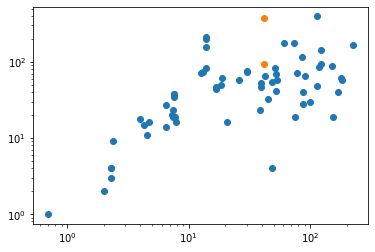

In [19]:
# Filter by the correct lithology
lith = df[df["Lithology category[c]"] == 3]

# Your plot here
fig, ax = plt.subplots()
im0= plt.scatter(lith['MAP (cm/yr)'], lith['D (cm2/yr)'])
im2= plt.scatter([42, 42], K)
ax.set_yscale("log")
ax.set_xscale("log")

# Deliverable checklist

1. histogram of diffusion values in study
2. reproduced Figure 2
3. boxplot of diffusion values grouped by study method with a few sentences
4. sick dataviz
5. Alaska field data: few sentences and a plot

---

